# Advanced Machine Learning. Homework #3

<br>
Task text:
<br>

https://docs.google.com/document/d/1FWCuz-3Q_85yQYEwz6xVkIuXUjQn60dVFxreJId-liM/
<br>

In [ ]:
import re
import random
from copy import copy
from collections import Counter
from itertools import combinations_with_replacement, permutations

import numpy as np
import pandas as pd
# from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Start with loading files and setting constants

In [ ]:
with open("./WarAndPeace.txt", "r") as file:
    war_and_peace_ru = file.read().lower().replace("\n", " ")
    
with open("./WarAndPeaceEng.txt", "r") as file:
    war_and_peace_en = file.read().lower().replace("\n", " ")
    
with open("./AnnaKarenina.txt", "r") as file:
    anna_karenina = file.read().lower().replace("\n", " ")
    
regex_ru = re.compile("[^а-яА-ЯёЁ ]")
regex_en = re.compile("[^a-zA-Z ]")

alphabet_ru = [" "] + [chr(code) for code in range(ord("а"), ord("я") + 1)] + ["ё"]
alphabet_en = [" "] + [chr(code) for code in range(ord("a"), ord("z") + 1)]

Functions to create ngram lists and frequency dictionaries

In [ ]:
def normalize_text(text, regex):
    text = regex.sub("", text.lower())
    text = re.sub("\s+", " ", text)
    return text

def create_ngram_list(text, ngram_len=1):
    return [text[start_ix : start_ix+ngram_len] for start_ix in range(len(text) - ngram_len)]

def create_freq_dict(ngram_list, alphabet=None, eps=1e-9):
    freq_dict = dict(Counter(ngram_list))
    dict_size = len(ngram_list)
    if alphabet is not None:
        ngram_len = len(ngram_list[0])
        for sym_set in combinations_with_replacement(alphabet, ngram_len):
            for ngram in set(permutations(sym_set, ngram_len)):
                ngram = "".join(list(ngram))
                if ngram not in freq_dict:
                    freq_dict[ngram] = eps
                else:
                    freq_dict[ngram] = freq_dict[ngram] / dict_size
    return freq_dict

Process text and create frequency dictionaries for unigrams and bigrams

In [ ]:
text = normalize_text(war_and_peace_ru, regex_ru)

unigram_list = create_ngram_list(text, ngram_len=1)
bigram_list = create_ngram_list(text, ngram_len=2)

base_unigram_freq_dict = create_freq_dict(unigram_list, alphabet=alphabet_ru)
base_bigram_freq_dict = create_freq_dict(bigram_list, alphabet=alphabet_ru)

## First try: Frequency method
<br>

- calculate frequencies of symbols in base (large) and test (small) text and decipher test text
- same approach for bigrams

In [ ]:
def frequency_method(test_text, true_freq_dict, ngram_len):
    test_ngram_list = create_ngram_list(test_text, ngram_len=ngram_len)
    test_freq_dict = create_freq_dict(test_ngram_list, alphabet=alphabet_ru)    
    
    true_keys = sorted(true_freq_dict.keys(), key=lambda token: true_freq_dict[token], reverse=True)
    test_keys = sorted(test_freq_dict.keys(), key=lambda token: test_freq_dict[token], reverse=True)
    
    mapping = {test_token: true_token for test_token, true_token in zip(test_keys, true_keys)}

    test_ngrams = [test_text[start_ix : start_ix+ngram_len] for start_ix in range(0, len(test_text) - ngram_len, ngram_len)]
    decoded_text = "".join([mapping[ngram] for ngram in test_ngrams])
    return decoded_text

def get_sample(text, size=500):
    start_ix = np.random.randint(len(text) - size)
    return text[start_ix : start_ix + size]

Result for unigram/bigram frequency with test text of size 500:

In [ ]:
test_text_500 = get_sample(text, size=500)
unigram_decoded_text_500 = frequency_method(test_text_500, base_unigram_freq_dict, ngram_len=1)
bigram_decoded_text_500 = frequency_method(test_text_500, base_bigram_freq_dict, ngram_len=2)

print(f"Original text:\n{test_text_500}\n\nFrequency method decoding using unigrams:\n{unigram_decoded_text_500}\n\nFrequency method decoding using bigrams:\n{bigram_decoded_text_500}\n")

Original text:
ения как в механизме часов так и в механизме военного дела так же неудержимо до последнего результата раз данное движение и так же безучастно неподвижны за момент до передачи движения части механизма до которых еще не дошло дело свистят на осях колеса цепляясь зубьями шипят от быстроты вертящиеся блоки а соседнее колесо так же спокойно и неподвижно как будто оно сотни лет готово простоять этою неподвижностью но пришел момент зацепил рычаг и покоряясь движению трещит поворачиваясь колесо и сливае

Frequency method decoding using unigrams:
аиек рнр в пазниегпа ынсов тнр е в пазниегпа воаииожо ладн тнр яа иабламяепо ло уосдалиажо магбдьтнтн мнг лнииоа лвеяаиеа е тнр яа чагбынстио иауолвеяий гн попаит ло уамалные лвеяаиек ынсте пазниегпн ло ротомйз аша иа лохдо ладо свесткт ин оскз родасн цаудкксь гбчькпе хеукт от чйстмотй вамткшеаск чдоре н сосалиаа родасо тнр яа суороэио е иауолвеяио рнр чблто оио сотие дат жотово умостокть щтою иауолвеяиостью ио умехад попаит гнцауед мйын

Result for unigram/bigram frequency with test text of size 2000:

In [ ]:
test_text_2000 = get_sample(text, size=2000)
unigram_decoded_text_2000 = frequency_method(test_text_2000, base_unigram_freq_dict, ngram_len=1)
bigram_decoded_text_2000 = frequency_method(test_text_2000, base_bigram_freq_dict, ngram_len=2)

print(f"Original text:\n{test_text_2000}\n\nFrequency method decoding using unigrams:\n{unigram_decoded_text_2000}\n\nFrequency method decoding using bigrams:\n{bigram_decoded_text_2000}\n")

Original text:
лагающие что они сказали нечто остроумное и оскорбительное милая ты моя княжна катерина семеновна нетерпеливо заговорил князь василий я пришел к тебе не за тем чтобы пикироваться с тобой а за тем чтобы как с родной хорошею доброю истинною родной поговорить о твоих же интересах я тебе говорю десятый раз что ежели письмо к государю и завещание в пользу пьера есть в бумагах графа то ты моя голубушка и с сестрами не наследница ежели ты мне не веришь то поверь людям знающим я сейчас говорил с дмитрием онуфриичем это был адвокат дома он то же сказал видимо чтото вдруг изменилось в мыслях княжны тонкие губы побледнели глаза остались те же и голос в то время как она заговорила прорывался такими раскатами каких она видимо сама не ожидала это было бы хорошо сказала она я ничего не хотела и не хочу она сбросила свою собачку с колен и оправила складки платья вот благодарность вот признательность людям которые всем пожертвовали для него сказала она прекрасно очень хорошо мне ничего н

We observe that frequency approach is not stable, it begins working a bit better for large test corpus, but is not appropriate for deciphering of short texts

## MCMC sampling

The idea is to obtain ngram frequency distribution via sampling. 

We have already calculated frquencies of ngrams in language using large base texts, now we sample different encryptions for test message, calculate respective frequencies and make a decision whether we agree with proposed sampled decoding (mapping from unknown symbol to known symbol) or not.

Distribution of frequencies of ngrams in text respond to multinomial distribution:

$$L(X) = P(X_i = x_i, \ i=1, \dots k) = \dfrac{n!}{x_1! \dots x_k!} p_1^{x_1} \dots p_k^{x_k},$$

where $x_i -$ number of occurencies of $i$-th token, $\ \sum_{i=1}^k x_i = n \ -$ total number of ngrams in test text.

Metropolis-Hastings approach implies to analyze fraction $\ \dfrac{L(X_{new})}{L(X_{cur})}, \ $ where $X_{new}, X_{cur} \ -$ new and current proposals on MCMC iteration respectively. We accept new proposal when fraction is greater than one, else we toss a coin to accept new proposal with probability equal to fraction.

In the terms of log-likelihood we may ignore factors in $L(X)$ and compare only sums $\ \sum_{i=1}^k x_k \log p_k.$ In our case $p_i$ responds to frequency of ngram in base text, $x_i$ is number of occurencies of $i$-th token in test text.

<br>
<br>
**Algorithm:**

I propose to start with some arbitrary <i>decoding</i> (mapping from unknown symbol to known symbol). On each iteration I do permutation of few elements (2 by default) in this mapping, make encryption, calculate test frequencies and then do MCMC step. If new mapping is accepted, I save it as best decoding for test message.

Permutation of decoding may be conducted in different ways:
- permute codes for 2 random unknown symbols,
- choose random number of symbols to permute from 2 to *max_permuted*
- linearly decay number of permutations from *max_permuted* to 2

Linear decay of number of permutations in decoding mapping is motivated as analogue of "scheduler for learning rate" in this task. On first iterations of algorithm we make larger and wider steps in many directions, and then on later iterations we make small permutations in decoding mapping, trying to not allow large deviations from optimum.

In [ ]:
class MCMCDecoder:
    def __init__(self, cipher_text, base_freq_dict, base_alphabet=alphabet_ru, deciphered_text=None):
        self.cipher_text = cipher_text
        self.base_freq_dict = copy(base_freq_dict)
        self.base_alphabet = base_alphabet
        self.ngram_len = len(list(self.base_freq_dict.keys())[0])
        self.deciphered_text = deciphered_text
        self._init_decoding()

    def _init_decoding(self):
        self.cipher_alphabet = list(set(self.cipher_text))
        self.decoding = {cipher: base for cipher, base in zip(self.cipher_alphabet, self.base_alphabet[:len(self.cipher_alphabet)])}
        self.accepted = 0
        self.acc_history = []
        self.loglike_history = []

    def _shuffled_decoding(self, size):
        cipher_syms = np.random.choice(self.cipher_alphabet, size=size, replace=False)
        cur_decoding = copy(self.decoding)
        base_syms = set(self.base_alphabet) - set(self.decoding.values()) | set([self.decoding[sym] for sym in cipher_syms])
        base_syms = np.random.choice(list(base_syms), size=size, replace=False)
        for csym, bsym in zip(cipher_syms, base_syms):
            cur_decoding[csym] = bsym
        return cur_decoding
    
    def _freqs_using_decoding(self, decoding):
        decoded_text = "".join([decoding[sym] for sym in self.cipher_text])
        decoded_ngram_list = create_ngram_list(decoded_text, ngram_len=self.ngram_len)
        decoded_freq_dict = create_freq_dict(decoded_ngram_list)
        return decoded_freq_dict
        
    def _log_likelihood(self, freq_dict):
        log_scores = [freq_dict[ngram] * np.log(self.base_freq_dict[ngram]) for ngram in freq_dict.keys()]
        return sum(log_scores)
    
    @staticmethod
    def _mcmc_step(cur_loglike, new_loglike):
        if new_loglike > cur_loglike:
            return True
        else:
            return (np.random.rand() < np.exp(new_loglike - cur_loglike))

    def run_mcmc(self, n_iter=30000, verbosity=1000, max_permuted=2, linear_schedule=False, print_deciphered=False):
        cur_freq_dict = self._freqs_using_decoding(self.decoding)
        cur_loglike = self._log_likelihood(cur_freq_dict)
        
        if linear_schedule:
            permutation_sizes = np.linspace(max_permuted, 2, num=n_iter).round().astype(int)
        else:
            permutation_sizes = np.random.randint(2, max_permuted + 1, size=n_iter)
            
        for i in range(n_iter):
            new_decoding = self._shuffled_decoding(size=permutation_sizes[i])
            new_freq_dict = self._freqs_using_decoding(new_decoding)
            new_loglike = self._log_likelihood(new_freq_dict)
            if self._mcmc_step(cur_loglike, new_loglike):
                self.decoding = copy(new_decoding)
                cur_loglike = new_loglike
                self.accepted += 1
            self.loglike_history.append(cur_loglike)
            
            if (i + 1) % verbosity == 0:
                if self.deciphered_text is not None:
                    proposed_text = self.decode()
                    correct = sum([(sym1 == sym2) for sym1, sym2 in zip(proposed_text, self.deciphered_text)])
                    self.acc_history.append(correct / len(self.cipher_text))
                    print(f"Iteration: {i + 1} | Accepted MCMC steps: {self.accepted} | Loglike: {cur_loglike} | Accuracy: {correct}/{len(self.cipher_text)}")
                else:
                    print(f"Iteration: {i + 1} | Accepted MCMC steps: {self.accepted} | Loglike: {cur_loglike}")
                if print_deciphered:
                    print(self.decode() + "\n")
    
    def decode(self):
        decoded_text = "".join([self.decoding[sym] for sym in self.cipher_text])
        return decoded_text

Let's try this method on some sample text

In [ ]:
ru_cipher_text = get_sample(text, 1000)
ru_cipher_text

' сами насилу спасли этого несчастного продолжала гостья и это сын графа кирилла владимировича безухова так умно забавляется прибавила она а говорили что так хорошо воспитан и умен вот всё воспитание заграничное куда довело надеюсь что здесь его никто не примет несмотря на его богатство мне хотели его представить я решительно отказалась у меня дочери отчего вы говорите что этот молодой человек так богат спросила графиня нагибаясь от девиц которые тотчас же сделали вид что не слушают ведь у него только незаконные дети кажется и пьер незаконный гостья махнула рукой у него их двадцать незаконных я думаю княгиня анна михайловна вмешалась в разговор видимо желая выказать свои связи и свое знание всех светских обстоятельств вот в чем дело сказала она значительно и тоже полушопотом репутация графа кирилла владимировича известна детям своим он и счет потерял но этот пьер любимый был как старик был хорош сказала графиня еще прошлого года красивее мужчины я не видывала теперь очень переменился с

In [ ]:
%%time
ru_decoder = MCMCDecoder(cipher_text=ru_cipher_text, base_freq_dict=base_bigram_freq_dict, base_alphabet=alphabet_ru, deciphered_text=ru_cipher_text)
ru_decoder.run_mcmc(25000, verbosity=1000)

Iteration: 1000 | Accepted MCMC steps: 222 | Loglike: -7922.954094834575 | Accuracy: 175/1000
Iteration: 2000 | Accepted MCMC steps: 430 | Loglike: -7224.960972795151 | Accuracy: 128/1000
Iteration: 3000 | Accepted MCMC steps: 611 | Loglike: -6849.452574029029 | Accuracy: 393/1000
Iteration: 4000 | Accepted MCMC steps: 789 | Loglike: -6639.905409696192 | Accuracy: 492/1000
Iteration: 5000 | Accepted MCMC steps: 994 | Loglike: -6189.630396431029 | Accuracy: 599/1000
Iteration: 6000 | Accepted MCMC steps: 1167 | Loglike: -6046.482722269221 | Accuracy: 613/1000
Iteration: 7000 | Accepted MCMC steps: 1350 | Loglike: -5988.755466405085 | Accuracy: 641/1000
Iteration: 8000 | Accepted MCMC steps: 1527 | Loglike: -5577.929239990672 | Accuracy: 931/1000
Iteration: 9000 | Accepted MCMC steps: 1685 | Loglike: -5577.929239990672 | Accuracy: 931/1000
Iteration: 10000 | Accepted MCMC steps: 1853 | Loglike: -5544.604483417568 | Accuracy: 972/1000
Iteration: 11000 | Accepted MCMC steps: 2036 | Loglike

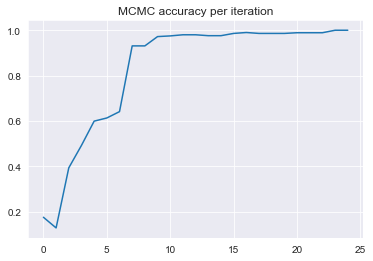

In [ ]:
plt.plot(ru_decoder.acc_history)
plt.title("MCMC accuracy per iteration");

In [ ]:
ru_decoded_text = ru_decoder.decode()
ru_decoded_text

' сами насилу спасли этого несчастного продолжала гостья и это сын графа кирилла владимировича безухова так умно забавляется прибавила она а говорили что так хорошо воспитан и умен вот всё воспитание заграничное куда довело надеюсь что здесь его никто не примет несмотря на его богатство мне хотели его представить я решительно отказалась у меня дочери отчего вы говорите что этот молодой человек так богат спросила графиня нагибаясь от девиц которые тотчас же сделали вид что не слушают ведь у него только незаконные дети кажется и пьер незаконный гостья махнула рукой у него их двадцать незаконных я думаю княгиня анна михайловна вмешалась в разговор видимо желая выказать свои связи и свое знание всех светских обстоятельств вот в чем дело сказала она значительно и тоже полушопотом репутация графа кирилла владимировича известна детям своим он и счет потерял но этот пьер любимый был как старик был хорош сказала графиня еще прошлого года красивее мужчины я не видывала теперь очень переменился с

Text of length 1000 is easily recognized by MCMC. Let's try on smaller text of size 300.

In [ ]:
ru_cipher_text_300 = get_sample(text, 300)
ru_cipher_text_300

'вершенно искренно с тем наивным и твердым убеждением женщин что наряд может сделать лицо красивым принялись за ее одеванье нет право мой добрый друг это платье нехорошо говорила лиза издалека боком взглядывая на княжну вели подать у тебя там есть масака право что ж ведь это может быть судьба жизни р'

In [ ]:
%%time
ru_decoder = MCMCDecoder(cipher_text=ru_cipher_text_300, base_freq_dict=base_bigram_freq_dict, base_alphabet=alphabet_ru, deciphered_text=ru_cipher_text_300)
ru_decoder.run_mcmc(100000, verbosity=5000)

Iteration: 5000 | Accepted MCMC steps: 277 | Loglike: -2029.3896948648712 | Accuracy: 54/300
Iteration: 10000 | Accepted MCMC steps: 464 | Loglike: -2008.0965985918683 | Accuracy: 76/300
Iteration: 15000 | Accepted MCMC steps: 648 | Loglike: -1928.856501449215 | Accuracy: 89/300
Iteration: 20000 | Accepted MCMC steps: 826 | Loglike: -1921.0867846376593 | Accuracy: 74/300
Iteration: 25000 | Accepted MCMC steps: 991 | Loglike: -1911.5495297387388 | Accuracy: 76/300
Iteration: 30000 | Accepted MCMC steps: 1175 | Loglike: -1799.4715573056112 | Accuracy: 109/300
Iteration: 35000 | Accepted MCMC steps: 1348 | Loglike: -1763.4952365260913 | Accuracy: 110/300
Iteration: 40000 | Accepted MCMC steps: 1529 | Loglike: -1742.343248737515 | Accuracy: 146/300
Iteration: 45000 | Accepted MCMC steps: 1686 | Loglike: -1739.3588477884382 | Accuracy: 146/300
Iteration: 50000 | Accepted MCMC steps: 1843 | Loglike: -1732.255398745332 | Accuracy: 170/300
Iteration: 55000 | Accepted MCMC steps: 2023 | Loglike

In [ ]:
ru_decoded_text = ru_decoder.decode()
ru_decoded_text

'верженно идкренно д сем наивным и свертым убегтением генщин эсо нарят могес дтелась лицо крадивым принялидь ча ее отеванье нес право мой тобрый труш зсо пласье нехорожо шоворила лича ичталека боком вчшлятывая на княгну вели потась у себя сам едсь мадака право эсо г веть зсо могес бысь дутьба гични р'

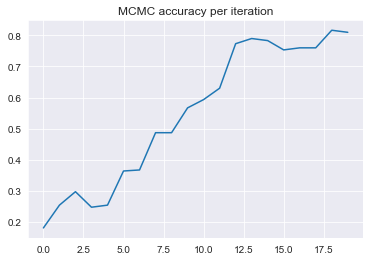

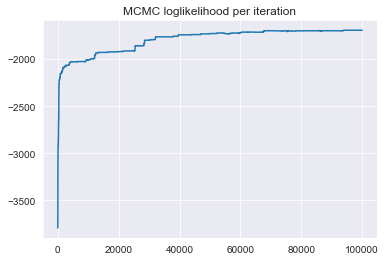

In [ ]:
plt.plot(ru_decoder.acc_history)
plt.title("MCMC accuracy per iteration")
plt.show();

plt.plot(ru_decoder.loglike_history)
plt.title("MCMC loglikelihood per iteration")
plt.show();

Let's try to use more iterations and apply larger steps on start of algorithm

In [ ]:
%%time
ru_decoder = MCMCDecoder(cipher_text=ru_cipher_text_300, base_freq_dict=base_bigram_freq_dict, base_alphabet=alphabet_ru, deciphered_text=ru_cipher_text_300)
print("Iterations in linear decay mode")
ru_decoder.run_mcmc(70000, verbosity=10000, max_permuted=10, linear_schedule=True)
print("Iterations in constant mode")
ru_decoder.run_mcmc(200000, verbosity=20000, max_permuted=2)

Iterations in linear decay mode
Iteration: 10000 | Accepted MCMC steps: 27 | Loglike: -2130.8166217777316 | Accuracy: 83/300
Iteration: 20000 | Accepted MCMC steps: 31 | Loglike: -2086.4640407114525 | Accuracy: 71/300
Iteration: 30000 | Accepted MCMC steps: 39 | Loglike: -1979.0910583403147 | Accuracy: 109/300
Iteration: 40000 | Accepted MCMC steps: 46 | Loglike: -1859.5704826573644 | Accuracy: 117/300
Iteration: 50000 | Accepted MCMC steps: 49 | Loglike: -1853.1588577646244 | Accuracy: 120/300
Iteration: 60000 | Accepted MCMC steps: 70 | Loglike: -1814.25130380363 | Accuracy: 121/300
Iteration: 70000 | Accepted MCMC steps: 258 | Loglike: -1784.431452765656 | Accuracy: 137/300
Iterations in constant mode
Iteration: 20000 | Accepted MCMC steps: 951 | Loglike: -1745.7890046497632 | Accuracy: 162/300
Iteration: 40000 | Accepted MCMC steps: 1708 | Loglike: -1714.4028803781782 | Accuracy: 187/300
Iteration: 60000 | Accepted MCMC steps: 2467 | Loglike: -1663.7418052453318 | Accuracy: 284/300

In [ ]:
ru_decoded_text = ru_decoder.decode()
ru_decoded_text

'вершенно искренно с тем наивным и твердым убеждением женщин это наряд может сделать лицо красивым принялись за ее одеванье нет право мой добрый друг что платье нехорошо говорила лиза издалека боком взглядывая на княжну вели подать у тебя там есть масака право это ж ведь что может быть судьба жизни р'

This time we managed to decode text, but we had to do more iterations.

As we see, sampling method needs more iterations when test message is shorter. Unfortunately, we have no upper bound for number of iterations and can only hope that convergence to true answer would happen. Also, this method is stochastic and its performance heavily depends on random sampling procedure. So, if proper resul was not achieved at once, we should launch algorithm again.

Now let's try MCMC sampling method to decipher message:

In [ ]:
cipher_text = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

In [ ]:
%%time
decoder = MCMCDecoder(cipher_text=cipher_text, base_freq_dict=base_bigram_freq_dict, base_alphabet=alphabet_ru)
print("Iterations in linear decay mode")
decoder.run_mcmc(100000, verbosity=10000, max_permuted=15, linear_schedule=True)
print("Iterations in constant mode")
decoder.run_mcmc(150000, verbosity=10000, max_permuted=2)

Iterations in linear decay mode
Iteration: 10000 | Accepted MCMC steps: 14 | Loglike: -1728.706494831766
Iteration: 20000 | Accepted MCMC steps: 17 | Loglike: -1576.8087047084437
Iteration: 30000 | Accepted MCMC steps: 20 | Loglike: -1531.6120605795477
Iteration: 40000 | Accepted MCMC steps: 21 | Loglike: -1513.8535473696597
Iteration: 50000 | Accepted MCMC steps: 21 | Loglike: -1513.8535473696597
Iteration: 60000 | Accepted MCMC steps: 21 | Loglike: -1513.8535473696597
Iteration: 70000 | Accepted MCMC steps: 27 | Loglike: -1433.7592514190214
Iteration: 80000 | Accepted MCMC steps: 37 | Loglike: -1379.4579042322882
Iteration: 90000 | Accepted MCMC steps: 59 | Loglike: -1329.4313453223226
Iteration: 100000 | Accepted MCMC steps: 187 | Loglike: -1317.834671866079
Iterations in constant mode
Iteration: 10000 | Accepted MCMC steps: 447 | Loglike: -1316.6780427135925
Iteration: 20000 | Accepted MCMC steps: 711 | Loglike: -1323.8435838425635
Iteration: 30000 | Accepted MCMC steps: 966 | Logl

In [ ]:
decoder.run_mcmc(200000, verbosity=20000, max_permuted=2, print_deciphered=True)

Iteration: 20000 | Accepted MCMC steps: 7603 | Loglike: -1301.5785136416932
есни вы викире тодманятый ини зочри тодманятый релср у эрого сообщетих лородый негло здочираря слодее всего вы все скенани здавинято и зонучире малсиманятый банн жа зоснектее черведрое жакатие лудса порх лотечто х тичего те обещаъ

Iteration: 40000 | Accepted MCMC steps: 8161 | Loglike: -1299.7610931531128
есна вы вачаре тодкинятый ана зомра тодкинятый релср у прого сообщетаю лородый негло здомариря слодее всего вы все сченина здиванято а зонумаре килсакинятый бинн ши зоснечтее мерведрое шичитае лудси хорю лотемто ю тамего те обещиё

Iteration: 60000 | Accepted MCMC steps: 8720 | Loglike: -1302.1700681650236
есна вы вамаре тодлинятый ана зочра тодлинятый рекср у фрого сообщетах кородый негко здочариря скодее всего вы все сменина здиванято а зонучаре ликсалинятый бинн пи зоснемтее черведрое пимитае кудси шорх котечто х тачего те обещию

Iteration: 80000 | Accepted MCMC steps: 9297 | Loglike: -1299.763062166858
е

In [ ]:
decoded_text = decoder.decode()
decoded_text

'если вы вимите нодральный или зочти нодральный текст у этого сообщения котодый легко здочитать скодее всего вы все смелали здавильно и золучите раксиральный балл па зослемнее четведтое памание кудса хотя конечно я ничего не обещац'

Несложно догадаться, что зашифрованное послание можно перевести как:

<i>"Если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю"</i>